## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

:В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [5]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [6]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [7]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [8]:
nulls = pd.concat((train.isnull().sum(), test.isnull().sum()),  axis = 1)
nulls.columns = ['train', 'test']
nulls

,train,test
tBodyAccMag-mean(),0,0
tBodyGyroJerk-mad()-X,0,0
tGravityAcc-min()-X,0,0
tBodyAcc-max()-X,0,0
"fBodyAcc-bandsEnergy()-1,8.2",0,0
"angle(X,gravityMean)",0,0
"angle(Y,gravityMean)",0,0
"angle(Z,gravityMean)",0,0
fBodyAcc-skewness()-X,0,0
subject,0,0


In [9]:
empty = pd.DataFrame({'train':[train.duplicated().sum()],
              'test': [test.duplicated().sum()]})
empty.rename(index={0: 'duplicated_count'})

,train,test
duplicated_count,0,0


### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

Уберу строку count, она просто показывает количество обработанных строк = 7352 везде, столбец subject - просто номера подопытных


In [10]:
stats_train = train.describe()
pd.DataFrame(stats_train).drop('count')

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
mean,-0.543884,-0.727735,0.678505,-0.468604,-0.847963,-0.489547,0.058593,-0.056515,-0.128562,17.413085
std,0.477653,0.315832,0.508656,0.544547,0.233633,0.511807,0.297480,0.279122,0.403686,8.975143
min,-1.000000,-0.999889,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.931208,1.000000
25%,-0.983282,-0.991595,0.804270,-0.936219,-0.999480,-0.812065,-0.017885,-0.143414,-0.486841,8.000000
50%,-0.883371,-0.950268,0.926693,-0.881637,-0.986582,-0.709417,0.182071,0.003181,-0.163271,19.000000
75%,-0.106892,-0.474625,0.965095,-0.017129,-0.764508,-0.509079,0.248353,0.107659,0.155112,26.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.478157,1.000000,1.000000,30.000000


Сделаем то же самое для test таблицы. Из интересного, то, что функция describe учитывает только строки с числами, столбец "Активность" пропал при вызове, так как там был текст.


In [11]:
stats_test = test.describe()
pd.DataFrame(stats_test).drop('count')

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
mean,-0.559043,-0.735661,0.696878,-0.462063,-0.880361,-0.513923,0.074886,-0.048720,-0.154042,12.986427
std,0.439539,0.282074,0.502873,0.523916,0.160496,0.509205,0.324300,0.241467,0.392203,6.950984
min,-0.998936,-1.000000,-0.756774,-0.952357,-0.999989,-0.984195,-0.913704,-0.949228,-1.000000,2.000000
25%,-0.978433,-0.989078,0.836787,-0.934447,-0.999330,-0.829722,0.022140,-0.098485,-0.497070,9.000000
50%,-0.861830,-0.914698,0.934930,-0.852659,-0.979336,-0.729648,0.181563,-0.010671,-0.202050,12.000000
75%,-0.149596,-0.486423,0.970871,-0.009965,-0.799113,-0.545939,0.260252,0.092373,0.140254,18.000000
max,0.479547,0.117606,0.996148,0.786436,0.048730,0.833180,1.000000,0.973113,0.960367,24.000000


### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [12]:
activities = train['Activity'].value_counts()
round(1-(min(activities)/max(activities)),2)

# будем считать, что в train данные сбалансированы

0.3

In [13]:
activities = test['Activity'].value_counts()
round(1-(min(activities)/max(activities)),2)
# а здесь в test все ок

0.22

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

Избавимся от категориального признака "Активность" быстренько закодировав его. Столбец "Subject" является порядковым целочисленным, нет смысла рассматривать корреляцию значений экспериментов с номером (просто цифра) участника. Если бы стояло условие формата "есть участники из 30 групп, покажите зависимость результатов эксперимента участника от того из какой он группы, то столбец subject можно было бы отнести к категориальным. В данном случае будем просто рассматривать его как нумерацию участников, удаляем, для подсчета корреляции он не имеет смысла

In [14]:
train.shape[1] #количество столбцов исходной матрицы

11

In [15]:
set(train['Activity']) # всего типов активности - 6 шт

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

In [16]:
# здесь убираем номер испытуемого, кодируем только текстовую категорию "Активность"
train_dum = pd.get_dummies(train)
train_dum.drop('subject', axis = 1, inplace = True)
train_dum.corr().head()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
tBodyAccMag-mean(),1.000000,0.899080,0.369962,0.959827,0.697832,-0.370849,0.495561,0.426283,0.379796,-0.396643,-0.396389,-0.414460,0.358825,0.561344,0.405434
tBodyGyroJerk-mad()-X,0.899080,1.000000,0.380118,0.879900,0.507939,-0.382246,0.478567,0.380967,0.266002,-0.386730,-0.379403,-0.370699,0.531695,0.445048,0.257524
tGravityAcc-min()-X,0.369962,0.380118,1.000000,0.380404,0.239088,-0.988663,0.797116,0.667415,-0.261676,-0.973167,0.187055,0.262354,0.234820,0.192409,0.159741
tBodyAcc-max()-X,0.959827,0.879900,0.380404,1.000000,0.613383,-0.384192,0.480229,0.405023,0.335708,-0.394745,-0.387297,-0.399861,0.298526,0.658369,0.347429
"fBodyAcc-bandsEnergy()-1,8.2",0.697832,0.507939,0.239088,0.613383,1.000000,-0.213318,0.363170,0.423927,0.260316,-0.287395,-0.276766,-0.296141,0.189834,0.217399,0.534750


Второй вариант уже через через sklearn попробуем. Это если все же кодировать как "Активность", так и столбец "subject", если бы мы отнесились к нему как к категории. Но особо смысла нет при заданном условии. Просто пробую второй метод, интересно было ;)

Планируется 36 столбцов, поэтому заранее тык ниже

In [17]:
pd.set_option('display.max_columns', 36)  # установим нужный размер отображения таблицы

In [18]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse = False)
encoded_cols = pd.DataFrame(onehotencoder.fit_transform(train[['Activity','subject']])) # кодируем по двум столбцам
feature_names = onehotencoder.get_feature_names_out(['Activity','subject']) # собираем названия, чтобы не запутаться

encoded_cols.columns = feature_names # меняем название колонок у закодированной таблицы
final_train = train.join(encoded_cols) # объединяем
final_train.drop(['Activity', 'subject'], axis = 1, inplace = True) # удаляем повторные столбцы из финальной версии
final_train.head()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS,subject_1,subject_3,subject_5,subject_6,subject_7,subject_8,subject_11,subject_14,subject_15,subject_16,subject_17,subject_19,subject_21,subject_22,subject_23,subject_25,subject_26,subject_27,subject_28,subject_29,subject_30
0,-0.959434,-0.992165,0.977436,-0.934724,-0.993592,-0.841247,0.179941,-0.058627,0.142051,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.979289,-0.989876,0.984520,-0.943068,-0.998235,-0.844788,0.180289,-0.054317,-0.692541,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.983703,-0.987868,0.986770,-0.938692,-0.999388,-0.848933,0.180637,-0.049118,-0.727227,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.986542,-0.991241,0.986821,-0.938692,-0.999807,-0.848649,0.181935,-0.047663,-0.599118,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.992827,-0.992882,0.987434,-0.942469,-0.999806,-0.847865,0.185151,-0.043892,-0.676997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Из интересного можем увидеть, что в табличке train представлены результаты тестов не всех подопытных, вместо 30 (столько всего участников), закодирована была информация только по 21 участнику, значит оставшиеся 9 сидят в табличке test.




Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

Ураааа

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

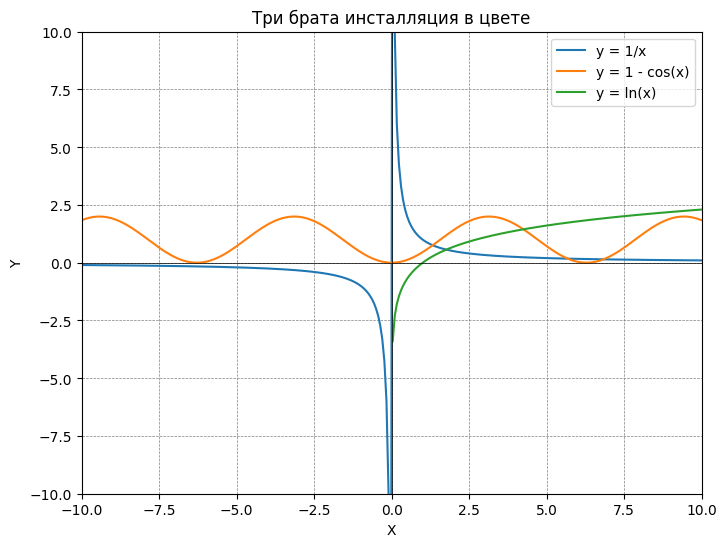

In [19]:
plt.figure(figsize=(8, 6))  # задаем размер графика

x = np.linspace(-10, 10, 300) # значения для функция
y1 = 1 / x
y2 = 1 - np.cos(x)
y3 = np.log(x)

plt.plot(x, y1, label='y = 1/x') # рисуем гиперболу
plt.plot(x, y2, label='y = 1 - cos(x)') # рисуем  1 - np.cos(x)
plt.plot(x, y3, label='y = ln(x)') # а так же закинем еще и логарифм

# Настройки по мелочи
plt.xlim(-10, 10) # область видимости
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5) # рисуем оси х и у
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5) # ну и клеточки еще, чтобы было лучше
plt.legend(); # подписи, где какой график
plt.title('Три брата инсталляция в цвете');
plt.xlabel('X')
plt.ylabel('Y');

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

In [20]:
table = pd.concat([train['Activity'].value_counts(), test['Activity'].value_counts()], axis = 1) # склеили две таблички
table.columns = ['train', 'test'] # общая табличка

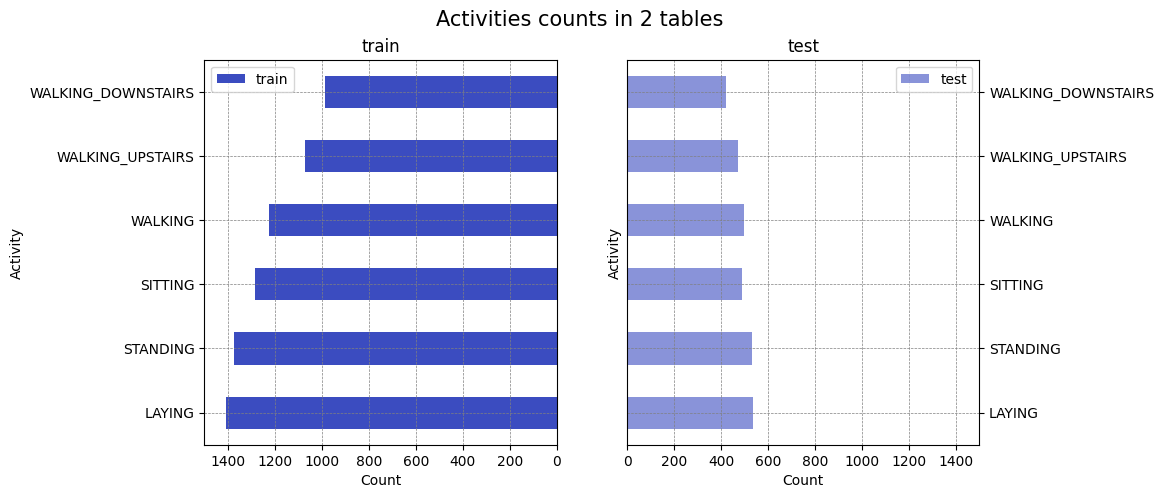

In [21]:
# настраиваем размер
plt.figure(figsize=(10, 5))
plt.suptitle('Activities counts in 2 tables', fontsize = 15)

 # лепим левый график
plt.subplot(1,2,1)
plt.xlim(0, 1500)
table['train'].plot(kind='barh', title='train', cmap='coolwarm', label = 'train').invert_xaxis()
plt.xlabel('Count')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# лепим правый график
plt.subplot(1, 2, 2)
plt.xlim(0, 1500)
table['test'].plot(kind='barh', title='test', cmap='coolwarm', alpha = 0.6, label = 'test').yaxis.tick_right() # сдвигаем на правую сторону
plt.xlabel('Count')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5) # добавляем сетку на график
plt.legend();


Ну или такой тоже можно график, удобней смотреть на различия

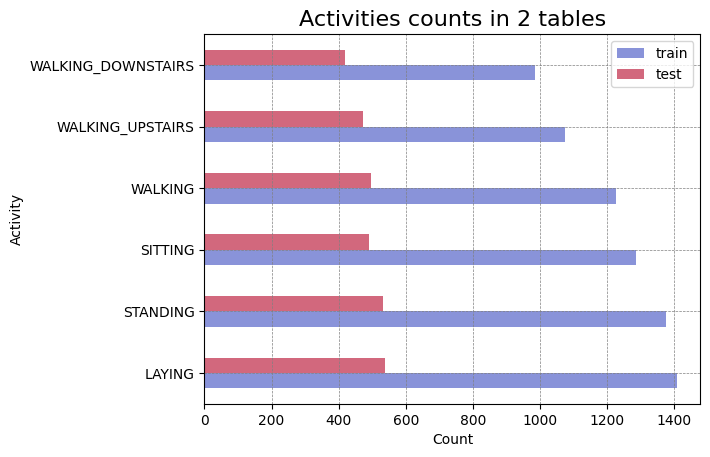

In [22]:
difference = table.plot(kind = 'barh', cmap='coolwarm', alpha = 0.6);
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);
plt.xlabel('Count')
difference.set_title('Activities counts in 2 tables', fontsize=16);


Правда на таких графиках проще проверять баланс классов таргета?

Да, момент есть

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

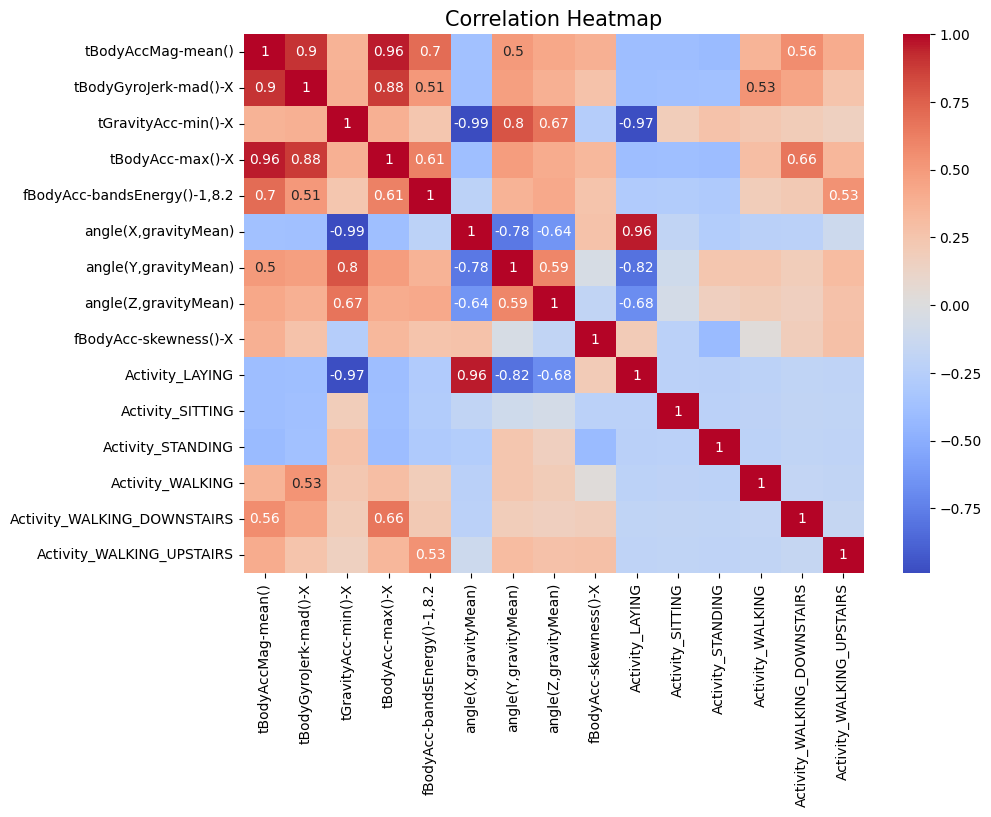

In [23]:
# задаем общие настройки
plt.figure(figsize = (10,7))
corr_train_dum = sns.heatmap(train_dum.corr(), cmap='coolwarm', annot=True, fmt='0.2g');
corr_train_dum.set_title('Correlation Heatmap', fontsize = 15)

# здесь сортируем, чтобы по модулю >= 0.5
for i in corr_train_dum.texts:
    if np.abs(float(i.get_text()))>=0.5:
        i.set_text(i.get_text())
    else:
        i.set_text("")

Будем строить корреляционную матрицу для train_dum. Там мы кодировали категорию активность и получили 6 видов деятельности.

Показатель порядкового номера subject можно убрать в данном случае, (подробно почему было описано в пункте 4) в таблице выше будет только корреляция сигналов, снятых в ходе экспериментов и видов активности. Эту матрицу можно интерпретировать как: значения полученных показатей от вида деятельности, который выполнялся участниками.


### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

In [24]:
# sns.pairplot(train);

Анализировать такое сразу чудовищно неудобно: оси далеко, непонятно какой график отвечает за что. Ориентироваться трудно, выделить какой-то интересный момент среди данной кучи еще сложнее

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

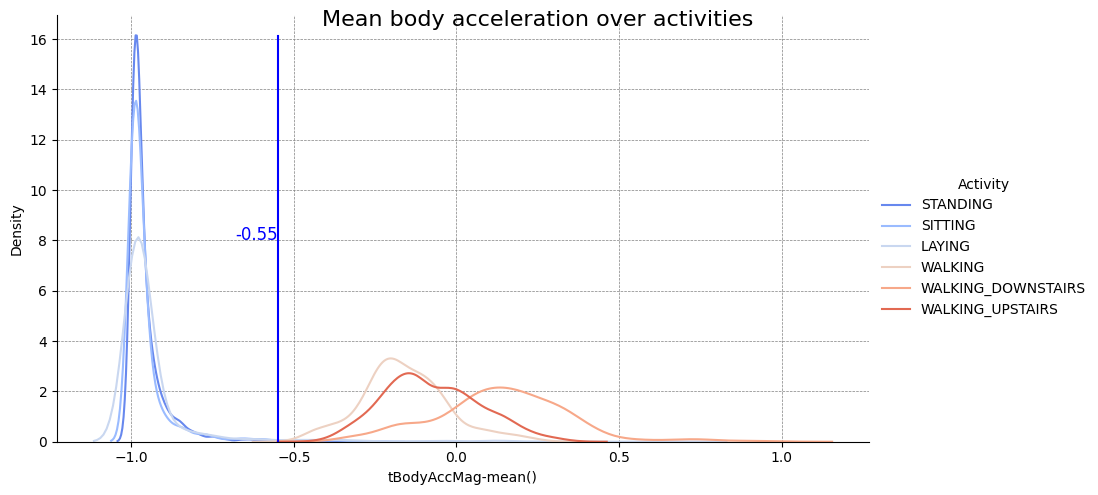

In [25]:
# лепим график
facet = sns.FacetGrid(data=train, hue="Activity", height=5, aspect=1.8, palette='coolwarm')
facet = facet.map(sns.kdeplot, "tBodyAccMag-mean()")

# линия разграничитель
plt.axvline(x=-0.55, ymin=0, ymax=0.95, color = 'blue')
plt.text(-0.55, 8, '-0.55', color='blue', fontsize=12, ha='right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# название
plt.suptitle('Mean body acceleration over activities', fontsize=16);
facet.add_legend();

Визуально можно поставить разграничение на значении около -0.55 по Ох. Статические показатели будут слева, к данной категории можем отнести standing, sitting, laying. К динамическим - все оставшиеся 3 штуки, связанные с более-менее активной деятельностью. Дальше посчитаем насколько точно значение -0.55 будет делить категории наших активностей на статические и динамические.

In [26]:
# здесь делим трейн на табличку с динамическими и статическими классами
static_act =['STANDING', 'LAYING', 'SITTING']
static_df = train[train['Activity'].isin(static_act)]

dinamic_df = train[-train['Activity'].isin(static_act)]

In [27]:
static_train=static_df.Activity.value_counts()
static_train

Activity
LAYING      1407
STANDING    1374
SITTING     1286
Name: count, dtype: int64

In [28]:
static_split = train[train['tBodyAccMag-mean()']<=-0.55] # значения в столбце меньше -0.55
static_split = static_split['Activity'].value_counts() # считаем количество значений в категории "Активность"
static_split

Activity
STANDING    1371
LAYING      1359
SITTING     1270
Name: count, dtype: int64

In [29]:
compared = pd.concat([static_train, static_split, static_split/static_train], axis=1)
compared.columns = ['static_train', 'static_split', 'Доля попадания']
compared

,static_train,static_split,Доля попадания
Activity,,,
LAYING,1407,1359,0.965885
STANDING,1374,1371,0.997817
SITTING,1286,1270,0.987558


Если делим статические активности по сигналу tBodyAccMag-mean со значением < -0.55, то попадаем в точку в большинстве случаев. В табличке выше указана разбивка по каждой категории, в среднем будет следующее значение

По графику можно сделать вывод, что статические показатели (стояние и сидение) принимают преимущественно отрицательные значения по сигналу 'tBodyAccMag-mean()' - усредненная величина ускорения тела. По виду деятельности "лежание" идет разброс из отрицательной зоны в положительную, с перевесом в отрицательную.


### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

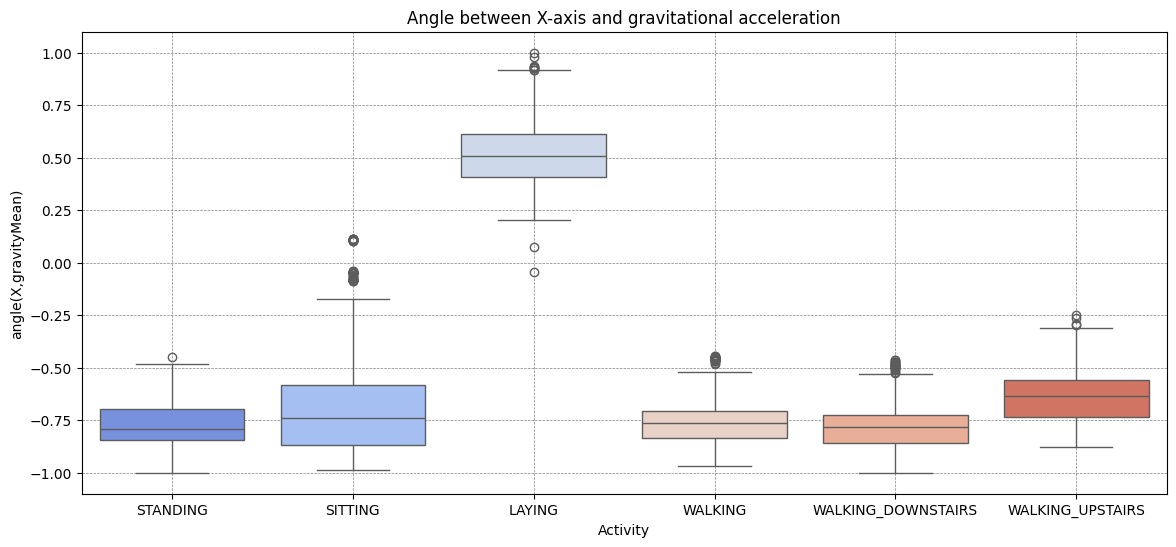

In [30]:
# общие настройки
plt.figure(figsize = (14,6))
boxes = sns.boxplot(x="Activity", y="angle(X,gravityMean)", data=train, palette='coolwarm');
boxes.set(title = 'Angle between X-axis and gravitational acceleration');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

In [31]:
agg_func_math = {'angle(X,gravityMean)':['min', 'max', 'median']}
train.groupby('Activity').agg(agg_func_math)

angle(X,gravityMean)                    
                                    min       max    median
Activity                                                   
LAYING                        -0.043034  1.000000  0.509009
SITTING                       -0.987260  0.114230 -0.738743
STANDING                      -0.999380 -0.450563 -0.791113
WALKING                       -0.967689 -0.446261 -0.764617
WALKING_DOWNSTAIRS            -1.000000 -0.460887 -0.783963
WALKING_UPSTAIRS              -0.876955 -0.246872 -0.633239

Можно заметить, что категория лежание принимает в основном положительные значения, значения по всем другим активностям лежат в отрицательной зоне

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

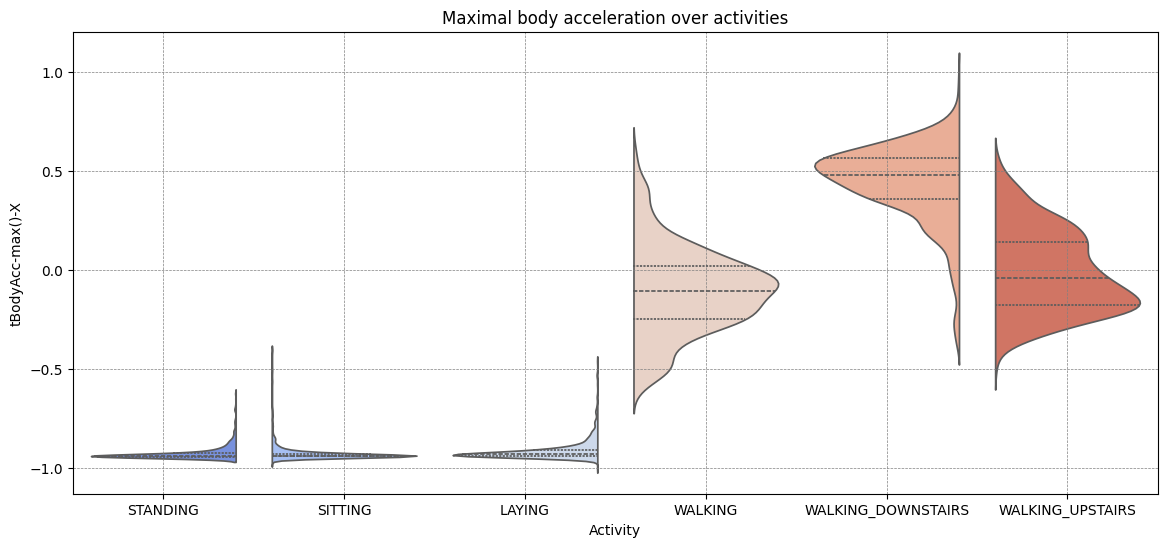

In [32]:
plt.figure(figsize = (14,6))
vioins = sns.violinplot(data=train, x="Activity", y= "tBodyAcc-max()-X", palette = 'coolwarm', inner="quart", split = True);
vioins.set(title = 'Maximal body acceleration over activities');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

In [33]:
agg_func_math = {'tBodyAcc-max()-X':['min', 'max', 'median']}
train.groupby('Activity').agg(agg_func_math)

tBodyAcc-max()-X                    
                                min       max    median
Activity                                               
LAYING                    -1.000000 -0.459079 -0.927195
SITTING                   -0.974493 -0.399696 -0.937043
STANDING                  -0.950454 -0.620883 -0.937057
WALKING                   -0.618311  0.616643 -0.104540
WALKING_DOWNSTAIRS        -0.378894  1.000000  0.478742
WALKING_UPSTAIRS          -0.501135  0.565790 -0.039456

Можно заметить, что статические активности принимают в основном значение <-0.5, динамические категории больше этого значения грубо говоря.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [34]:
# здесь делим трейн на табличку с динамическими и статическими классами
static_act =['STANDING', 'LAYING', 'SITTING']
static_df = train[train['Activity'].isin(static_act)]

dinamic_df = train[-train['Activity'].isin(static_act)]

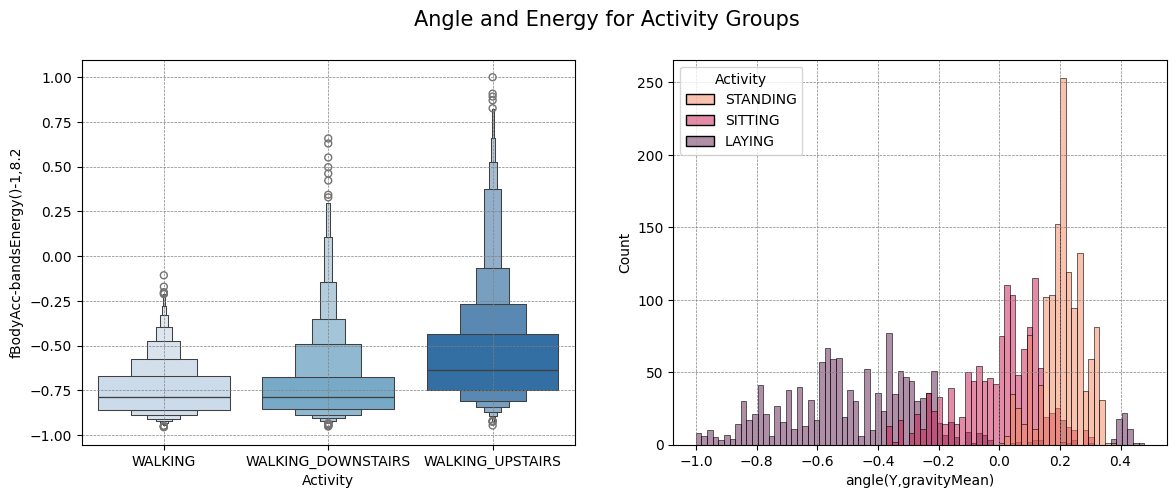

In [35]:
# общий настройки графика
plt.figure(figsize=(14, 5))
plt.suptitle('Angle and Energy for Activity Groups', fontsize=15)

# строим левый
plt.subplot(1,2,1)
sns.boxenplot(data = dinamic_df, x = 'Activity', y = 'fBodyAcc-bandsEnergy()-1,8.2', palette = 'Blues');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# строим правый
plt.subplot(1,2,2)
sns.histplot(data = static_df, x = 'angle(Y,gravityMean)', hue = 'Activity', palette = 'rocket_r', bins = 80);
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)


График слева: WALKING в основном в отрицательной зоне, другие динамическе выходят в положительную

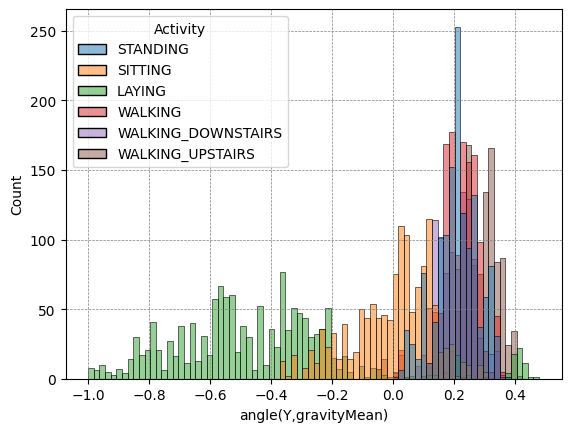

In [36]:
# занесла все активности на гистограмму
sns.histplot(data = train, x = 'angle(Y,gravityMean)', hue = 'Activity', bins = 80);
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

In [37]:
# ставим порог, будем использовать для правого графика
new_static_df = static_df[static_df['fBodyAcc-skewness()-X']< -0.376]

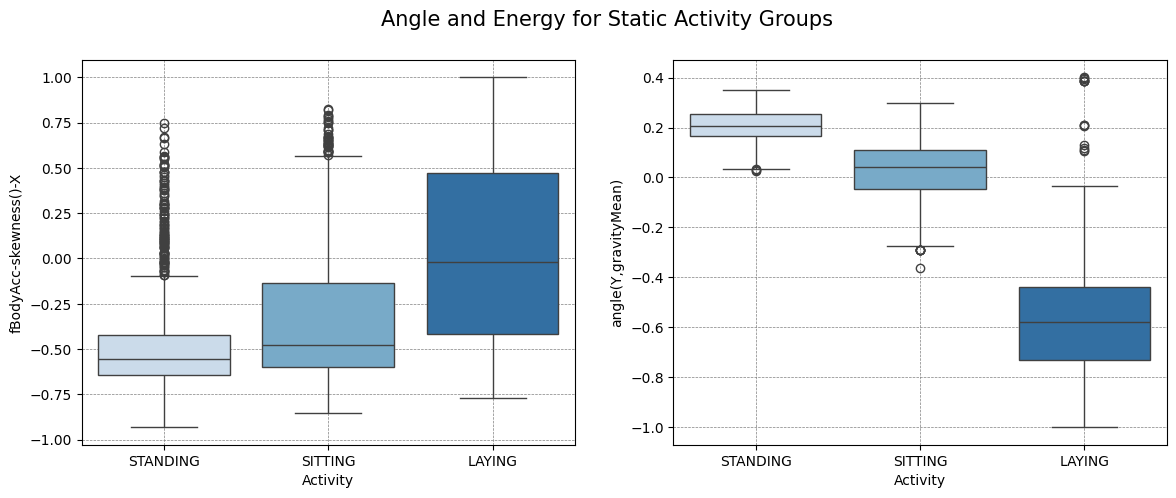

In [38]:
# общие настройки
plt.figure(figsize=(14, 5))
plt.suptitle('Angle and Energy for Static Activity Groups', fontsize=15)

# левый график, без порога
plt.subplot(1,2,1)
sns.boxplot(x = 'Activity', y = 'fBodyAcc-skewness()-X', data = static_df, palette = 'Blues');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

# правый график, с порогом
plt.subplot(1,2,2)
sns.boxplot(x = 'Activity', y = 'angle(Y,gravityMean)', data = new_static_df, palette = 'Blues');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

Ниже представлен бокслот для динамических активностей, никаких порогов нет. Здесь используется табличка dinamic_df из номера 12

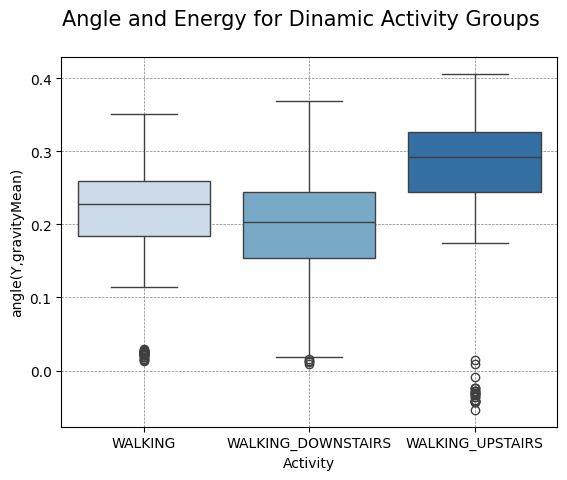

In [39]:
sns.boxplot(x = 'Activity', y = 'angle(Y,gravityMean)', data = dinamic_df, palette = 'Blues');
plt.suptitle('Angle and Energy for Dinamic Activity Groups', fontsize=15)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

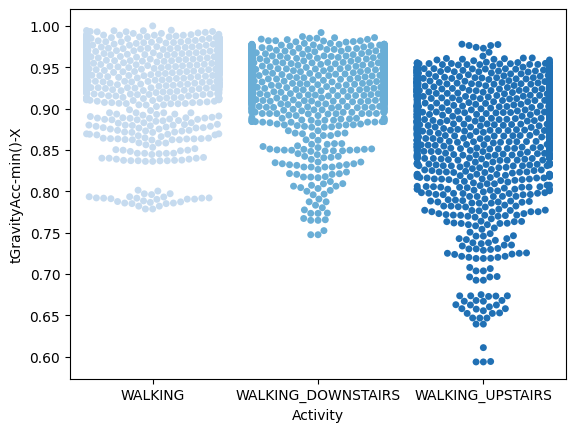

In [40]:
# исходное распредение без порога tBodyAcc-max()-X < 0.157
sns.swarmplot(x = 'Activity', y = 'tGravityAcc-min()-X', data = dinamic_df, palette = 'Blues');

In [41]:
dinamic_compared = pd.DataFrame(train['Activity'].value_counts()).iloc[3:]
dinamic_compared # количество наблюдений в динамических категориях всего без порога

,count
Activity,
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [42]:
# отсортированная таблица для динамических показателей с порогом tBodyAcc-max()-X < 0.157.
kek = dinamic_df[dinamic_df['tBodyAcc-max()-X']<0.157]

ОСТОРОЖНО ГРУЗИТСЯ 30 СЕКУНД

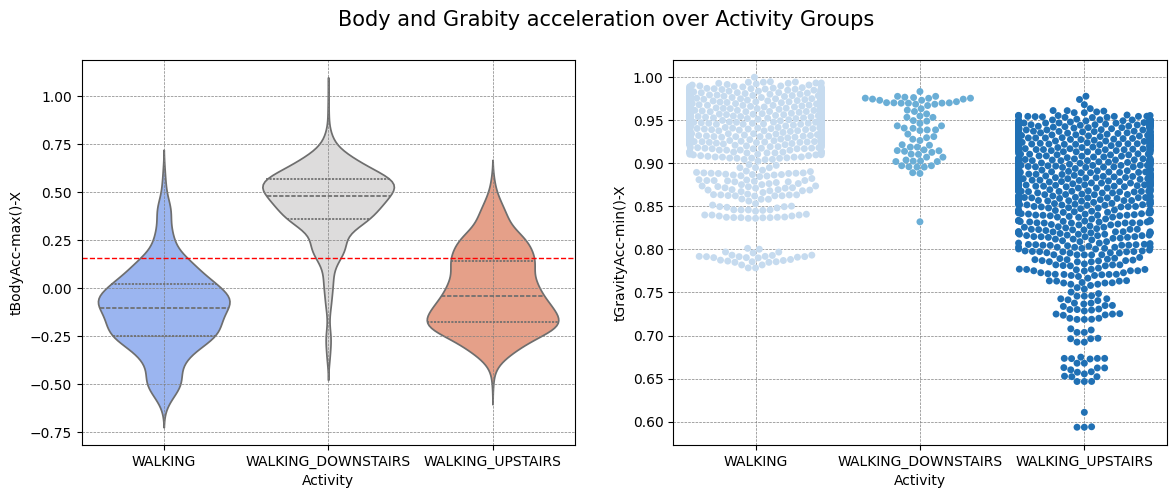

In [43]:
# общие настройки
plt.figure(figsize=(14, 5))
plt.suptitle('Body and Grabity acceleration over Activity Groups', fontsize=15)

# скрипки слева
plt.subplot(1,2,1)
violins = sns.violinplot(data=dinamic_df, x="Activity", y= "tBodyAcc-max()-X", palette = 'coolwarm', inner="quart");
violins.axhline(y=0.157, color='red', linestyle='--', linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

# точки справа с порогом - таблица kek
plt.subplot(1,2,2)
sns.swarmplot(x = 'Activity', y = 'tGravityAcc-min()-X', data = kek, palette = 'Blues');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5);

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
import plotly.express as px

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 53s, sys: 780 ms, total: 6min 54s
Wall time: 4min


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
px.scatter(df_2_comp, x= 'x', y ='y',hover_data=['Activity'], color='Activity')

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
px.scatter_3d(df_3_comp, x= 'x', y ='y', z = 'z',hover_data=['Activity'], color='Activity')

# Новый раздел

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

Оказалось, что нужна просто функция с условиями, она тоже есть здесь:


In [44]:
def predict(df): # классификация по условиям, создается столбец "У" в таблицах, в конце уберем его
  df['Y'] = 'UNKNOWN' # будем постепенно расставлять классы, а пока везде весит UNKNOWN
  df['Y'][(df['angle(X,gravityMean)']>0)] = 'LAYING'
  df['Y'][(df['angle(X,gravityMean)']<0)&(df['tBodyAcc-max()-X']<-0.45)&(df['angle(Y,gravityMean)']<0.1)] = 'SITTING'
  df['Y'][(df['angle(X,gravityMean)']<0)&(df['tBodyAcc-max()-X']<-0.5)&(df['angle(Y,gravityMean)']>0.1)] = 'STANDING'

  df['Y'][(df['angle(X,gravityMean)']<0)&(df['tBodyAcc-max()-X']>-0.6)&(df['tBodyAcc-max()-X']<0.3)&(df['tGravityAcc-min()-X']>0.95)] = 'WALKING'
  df['Y'][(df['angle(X,gravityMean)']<0)&(df['tBodyAcc-max()-X']>-0.5)&(df['tBodyAcc-max()-X']<0.3)&(df['tGravityAcc-min()-X']<0.95)] = 'WALKING_UPSTAIRS'
  df['Y'][df['Y'] == 'UNKNOWN'] = 'WALKING_DOWNSTAIRS' # всему, что не попало в категории выше, присваиваем значение WALKING_DOWNSTAIRS, проблематично было его выделить
  return df['Y']

def accuracy_score(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

train2_df = train
test2_df = test

# вызываем функции, в аргументе таблицы трейн и тест
train_preds = predict(train2_df)
test_preds = predict(test2_df)
print(f"Accuracy on train set => {accuracy_score(train2_df['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test2_df['Activity'], test_preds)}")

# столбец с ответом "У" появляется и в исходных таблицах трейн и тест, убираем его, чтобы при дальнейших программах не мешало, и чтобы модель выше работала без приколов
train.drop(['Y'], axis = 1, inplace = True)
test.drop(['Y'], axis = 1, inplace = True)

Accuracy on train set => 0.8244015233949945
Accuracy on test set => 0.7790973871733967
